<div style="text-align:center; font-size:29px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Lista 4
</div>

**Zadanie 1** 

Rozwiąż równanie: 
$$
\text{tg}(\pi - x) - x = 0 \tag{1}
$$

Na podstawie uzyskanych wyników wypełnij tabelę, korzystając z różnych metod numerycznych, takich jak:
- Metoda bisekcji,
- Metoda Brenta,
- Metoda siecznych,
- Metoda Newtona.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import cmath
from random import random
from scipy.optimize import fsolve

- Na początku definiujemy naszą funkcje za pomocą składni lambda:

In [7]:
f1 = lambda x: np.tan(np.pi - x) - x

<div style="text-align:center; font-size:23px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Metoda bisekcji
</div>

- Pierwszą metodą, którą zaimplementumemy będzie metoda bisekcji

In [8]:
def bisekcja(f, a, b, e):
    #liczymy wartość funkcji na końcach przedziału
    fa, fb = f(a), f(b)

    #sprawdzamy, czy jedno z końców przedziału jest już naszym szukanym miejscem zerowym
    if fa == 0:
        return a
    if fb == 0:
        return b
    
    #sprawdzamy, czy wartości funkcji na końcach przedziału mają przeciwny znak (warunek konieczny)
    if fa * fb > 0:
        raise(ValueError("Przedział jest źle dobrany. Szukane miejsce zerowe znajduje się poza przedziałem."))
    else:
        m = (a + b) / 2 #liczymy początkowy środek przedziału 
        fm = f(m) #wartość funkcji w naszym środkowym punkcie

        # liczymy maksymalną liczbę iteracji wymaganą do osiągnięcia dokładności `error`
        max_iter = int(math.ceil(math.log(abs(a-b)/e, 2)))
        
        num_add_mult = 11 #licznik operacji (dodawania/mnożenia)
        num_iter = 1

        for _ in range(max_iter):
            #sprawdzamy w której części przedziału znajduje się miejsce zerowe 
            if fm * fb < 0:
                a, b = m, b
                fa = fm
            elif fa * fm < 0:
                a, b = a, m
                fb = fm

            m = (a + b) / 2 #nowy środek przedziału 
            fm = f(m)

            num_iter += 1
            num_add_mult += 6 

            #sprawdzamy warunek stopu
            if abs(fm) < e:
                return m, fm, num_iter, num_add_mult
            
        return m, fm, num_iter, num_add_mult

- Funkcja ta znajduje miejsca zerowe funkcji $f(x)$, na zadanym przedziale $[a,b]$ z określoną dokładnością $\textit error$.

- Przykładowe użycie naszej funkcji (metoda bisekcji)

In [9]:
x, fm, n1, n2 = bisekcja(f1, 1.7, 2.8, 1e-8)

In [10]:
print(f"Rozwiązanie równania: x = {x:6.4f}\nf(x) = {fm}\nLiczba iteracji: {n1}\nLiczba dodawań i mnożeń: {n2}")

Rozwiązanie równania: x = 2.0288
f(x) = 6.53308918074913e-09
Liczba iteracji: 28
Liczba dodawań i mnożeń: 173


<div style="text-align:center; font-size:23px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Metoda Brenta
</div>

- Drugą zaimplementowaną metodą będzie metoda Brenta. Metoda Brenta jest hybrydową metodą numeryczną do znajdowania miejsc zerowych funkcji $f(x)$ w zadanym przedziale $[𝑎,𝑏]$ i łączy zalety trzech metod (metody bisekcji, metody siecznych, interpolacji kwadratowej).

In [11]:
def brent(f, a, b, e):
    #implementujemy początek taki sam jak w poprzednim kodzie
    fa, fb = f(a), f(b)
    if fa == 0:
        return a
    if fb == 0:
        return b
    if fa * fb > 0:
        raise ValueError("Przedział jest źle dobrany. Szukane miejsce zerowe znajduje się poza przedziałem.")
    
    c = a  #ustawiamy punkt c jako początkowy lewy koniec przedziału
    fc = fa #wartość funkcji w punkcie c

    #liczniki iteracji
    num_iter = 1
    num_add_mult = 5

    while abs(b - a) > e:
        num_add_mult += 1

        #jeśli wartości funkcji w punktach a, b i c są różne, używamy interpolacji kwadratowej
        if fa != fc and fb != fc:
            # wyliczamy punkt przez interpolację kwadratową
            x = (a * fb * fc / ((fa - fb) * (fa - fc)) + b * fa * fc / ((fb - fa) * (fb - fc)) + c * fa * fb / ((fc - fa) * (fc - fb)))
            num_add_mult += 20
        else:
            #jeśli nie można zastosować interpolacji, używamy metody siecznych
            x = b - fb * (b-a)/(fb-fa) 
            num_add_mult += 5

        #sprawdzamy, czy wynik interpolacji znajduje się w przedziale (a, b)
        if not (a < x < b):
            x = (a + b) / 2 #jeśli nie, wykonujemy krok bisekcji
            num_add_mult += 2
    
        fx = f(x)
        num_add_mult += 2
        if abs(fx) < e:
            return x, fx, num_iter, num_add_mult
        
        #aktualizujemy przedział w zależności od znaku wartości funkcji
        if fa * fx < 0:
            b, fb = x, fx
        else:
            a, fa = x, fx

        #aktualizujemy punkt c
        if abs(fa) < abs(fb):
            c, fc = a, fa
        else:
            c, fc = b, fb

        num_iter += 1
        num_add_mult += 1 
        
    return (a + b) / 2, f((a + b) / 2), num_iter, num_add_mult + 6


- Przykładowe użycie naszej funkcji

In [12]:
x, fm, n1, n2 = brent(f1, 1.7, 2.8, 1e-8)
print(f"Rozwiązanie równania: x = {x:6.4f}\nf(x) = {fm}\nLiczba iteracji: {n1}\nLiczba dodawań i mnożeń: {n2}")


Rozwiązanie równania: x = 2.0288
f(x) = -6.928547069406932e-09
Liczba iteracji: 49
Liczba dodawań i mnożeń: 445


<div style="text-align:center; font-size:23px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Metoda siecznych
</div>

- Kolejną metodą, którą zaimplementujemy będzie metoda siecznych.

Metoda siecznych to numeryczna metoda znajdowania miejsc zerowych funkcji $f(x) = 0$. Jest to wariant metody Newtona, ale nie wymaga obliczania pochodnej 
$f'(x)$. Zamiast tego, przybliża pochodną za pomocą różnicy funkcji w dwóch punktach, czyli:

$$
x_{n+1} = x_n - \frac{f(x_n) \cdot (x_n - x_{n-1})}{f(x_n) - f(x_{n-1})}.
$$

Metoda iteracyjnie przybliża rozwiązanie, wykorzystując tylko wartości funkcji, co czyni ją prostszą w implementacji w porównaniu z metodą Newtona.

**Wady **i zalety metody siecznych:**

Zalety:
1. **Brak konieczności liczenia pochodnej** – przydatne w przypadku funkcji, dla których obliczenie $f'(x)$jest trudne lub niemożliwe.


Wady:
1. **Zależność od punktów początkowych** – źle dobrane początkowe wartości $x_0, x_1$ mogą prowadzić do niestabilności.



In [13]:
def sieczne(f, a, b, max_i_num, tol=1e-8):
    #część kodu tak jak we wcześniejszych implementacjach
    fa, fb = f(a), f(b)
    if fa == 0:
        return a  
    if fb == 0:
        return b  
    if fa * fb > 0:
        raise ValueError("Przedział jest źle dobrany. Szukane miejsce zerowe znajduje się poza przedziałem.")
    
    x_stare = a       
    fxs = f(x_stare)  
    x = a - fa / (fb - fa) * (b - a)  #pierwszy krok metody siecznych (przybliżenie nowego punktu)
    fx = f(x)        

    num_iter = 1      
    num_add_mult = 12  

    for _ in range(max_i_num):
        #tymczasowe przechowanie poprzednich wartości x i f(x) przed aktualizacją
        x_s_tymczasowe, fxs_tymczasowe = x.copy(), fx.copy()

        #aktualizujemy punkt a (główna formuła metody siecznych)
        x -= fx * (x - x_stare) / (fx - fxs)
        fx = f(x)

        # Aktualizacja "starych" punktów x i f(x) dla następnej iteracji
        x_stare, fxs = x_s_tymczasowe, fxs_tymczasowe
        num_add_mult += 5

        #sprawdzamy warunku stopu: 
        if abs(fx) < tol:
            return x, fx, num_iter, num_add_mult

        num_iter += 1

    return x, fx, num_iter, num_add_mult


- Przykładowe użycie metody:

In [14]:
x,fx, n1, n2 = sieczne(f1, 1.7, 2.8,1000)
print(f"Rozwiązanie równania: x = {x:6.4f}\nf(x) = {fx}\nLiczba iteracji: {n1}\nLiczba dodawań i mnożeń: {n2}")

Rozwiązanie równania: x = 2.0288
f(x) = 6.878808633814515e-11
Liczba iteracji: 8
Liczba dodawań i mnożeń: 52


<div style="text-align:center; font-size:23px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Metoda Newtona
</div>

- Ostatnią już w tym zadaniu metodą do zaimplementowania będzie metoda Newtona.

Metoda Newtona to iteracyjna metoda numeryczna używana do znajdowania miejsc zerowych funkcji $f(x) = 0$. 
Główna idea metody polega na liniowym przybliżeniu funkcji $f(x)$ w punkcie $x_n$ przy użyciu jej pierwszej pochodnej $f'(x)$.

**Zalety:**
1. **Szybka zbieżność:** - dla dobrze dobranego początkowego przybliżenia $x_0$ i funkcji o gładkich właściwościach, metoda Newtona zbiega kwadratowo (bardzo szybko).
2. **Efektywność:** - jest bardziej efektywna niż metody bisekcji lub siecznych, gdy dostępna jest pochodna $f'(x)$.

---

**Wady:**
1. **Zależność od punktu początkowego:** - jeśli początkowe $x_0$ jest daleko od miejsca zerowego, metoda może nie zbiegać do rozwiązania.
2. **Wymaga pochodnej:** - obliczanie $f'(x)$ jest konieczne, co bywa problematyczne dla funkcji złożonych lub nieróżniczkowalnych.
3. **Ryzyko braku zbieżności:** - jeśli $f'(x_n) = 0$ lub jest blisko 0, metoda może przestać działać lub dawać błędne wyniki.

---


In [15]:
def newton(f, f_prime, x_0, max_i_num, tol=1e-8):
    x = x_0  # Punkt startowy
    num_iter = 1  #
    num_add_mult = 0  

    for _ in range(max_i_num):
        fx = f(x)
        num_add_mult += 2  

        #warunek stopu: jeśli wartość funkcji w punkcie jest mniejsza niż zadana tolerancja
        if abs(fx) < tol:
            return x, fx, num_iter, num_add_mult  # Zwracamy wynik

        #obliczamy wartość pochodnej funkcji w punkcie x
        fpx = f_prime(x)
        num_add_mult += 3  

        #obliczamy krok iteracji h = -f(x) / f'(x)
        h = - fx / fpx
        x += h

        num_iter += 1
        num_add_mult += 3  

    return x, fx, num_iter, num_add_mult


In [16]:
f_prime = lambda x: -1/math.cos(np.pi - x)**2 - 1

In [17]:
x, fx, num1, num2 = newton(f1, f_prime, 1.7, 1000)
print(f"Rozwiązanie równania: x = {x:6.8f}\nf(x) = {fx}\nLiczba iteracji: {num1}\nLiczba dodawań i mnożeń: {num2}")

Rozwiązanie równania: x = 2.02875784
f(x) = 1.5848211631919185e-11
Liczba iteracji: 7
Liczba dodawań i mnożeń: 50


<div style="text-align:center; font-size:23px; font-family:'Georgia'; font-weight:bold; color:plum;">
    Tabelka
</div>

\begin{array}{|c|c|c|c|c|}
\hline
 & \text{bisekcja} & \text{m. Brenta} & \text{m. siecznych} & \text{m. Newtona} \\ \hline
x & 2.0288 & 2.0288 & 2.0288 & 2.0288 \\ \hline
f(x) & 6.53308918074913e-09 & -6.928547069406932e-09 & 6.878808633814515e-11 & 1.5848211631919185e-11 \\ \hline
\text{liczba iteracji} & 28 & 49 & 8 & 7 \\ \hline
\text{liczba mnożeń i dodawań} & 173 & 445 & 52 & 50 \\ \hline
\end{array}%

- Sprawdźmy teraz wynik przy pomocy funkcji wbudowanej:

In [18]:
f_wbudowana = fsolve(f1, 2)
print(f"Rozwiązanie przy pomocy fsolve:\nx={f_wbudowana}")

Rozwiązanie przy pomocy fsolve:
x=[2.02875784]


**Zadanie 2**

Sporządź wykres funkcji 

$$
f(x) = \cosh(x) \cos(x) - 1
$$ 

w przedziale $ x \in [4, 8] $. Na podstawie wykresu sprawdź, że najmniejszy dodatni pierwiastek równania $ f(x) = 0 $ leży w przedziale $ (4, 5) $, a następnie pokaż, że iteracyjny wzór Newtona nie doprowadzi do tego pierwiastka, jeśli punktem startowym będzie $x_0 = 4$.


In [19]:
#definiujemy naszą funkcje z polecenia
f2 = lambda x: np.cosh(x) * np.cos(x) - 1
xs = np.linspace(4,8,1000)

In [20]:
f2_prime = lambda x: np.cos(x) * np.sinh(x) - np.sin(x) * np.cosh(x)
f2_bis = lambda x: -2 * np.sin(x) * np.sinh(x)

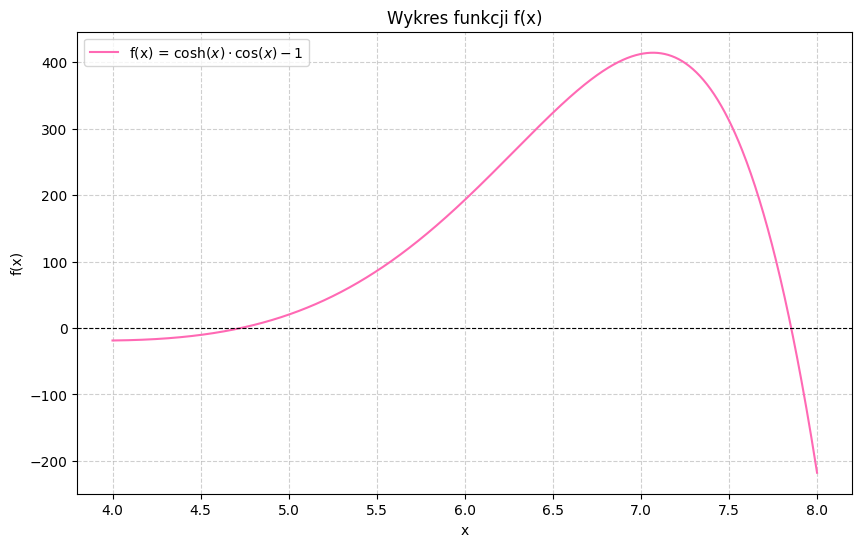

In [21]:
plt.figure(figsize=(10,6))
plt.plot(xs, f2(xs), label="f(x) = $\\cosh(x) \\cdot \\cos(x) - 1$", color="hotpink")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Wykres funkcji f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [22]:
def iteracyjny_newton_modyfikowany(f, f_prime, f_bis, x_0, max_i_num, tol=1e-8):
    #pkt początkowy
    x = x_0 

    for _ in range(max_i_num):
        fx = f(x)

        if abs(fx) < tol:
            return x
        
        fpx = f_prime(x)  #obliczamy wartość pierwszej pochodnej w punkcie x.
        fbx = f_bis(x) #obliczamy wartość drugiej pochodnej w punkcie x.

        #wyrażenie pomocnicze u = f(x) / f'(x), stosowane w modyfikacji wzoru Newtona.
        u = fx/fpx

        #wyrażenie pomocnicze t = f(x) * f''(x) / (f'(x))^2, które uwzględnia drugą pochodną funkcji.
        t = fx*fbx/fpx**2

        x -= u * 2/(1 + np.sqrt(1 - 2 * t))
    return x 

- Najpierw przetestujmy rozwiązanie standardową iteracyjną metodą Newtona startując od $x_0=4$.

In [23]:
x = newton(f2, f2_prime, 4, 1000)[0]
print(f"Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 4\nx = {x}")

Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 4
x = 10.995607838001671


- Teraz przy pomocy wbudowanej funkcji.

In [24]:
f_wbudowana = fsolve(f2, 4)
print(f"Rozwiązanie za pomocą wbudowanej metody fsolve:\nx={f_wbudowana}")

Rozwiązanie za pomocą wbudowanej metody fsolve:
x=[4.73004074]


- Rzeczywiście jak mówi polecenie wynik jest inny i metoda standardowa iteracyjna metody newtona nie daje nam tego oczekiwanego pierwiastka.

- Możemy jeszcze sprawdzić wynik przy użyciu zmodefikowanej metody:

In [25]:
x_m = iteracyjny_newton_modyfikowany(f2, f2_prime, f2_bis, 4, 1000)
print(f"Rozwiązanie modyfikowaną iteracyjną metodą Newtona startując od x0 = 4\nx = {x_m}")

Rozwiązanie modyfikowaną iteracyjną metodą Newtona startując od x0 = 4
x = 4.730040744862704


**Zadanie 3**

**Wyznaczenie czasu osiągnięcia prędkości dźwięku przez rakietę Saturn V**

Prędkość $v$ rakiety Saturn V w locie pionowym tuż przy powierzchni Ziemi można przybliżyć wzorem:

$$
v = u \ln \left( \frac{M_0}{M_0 - \dot{m} t} \right) - g t,
$$

gdzie:

- $u = 2510 \, \text{m/s}$ – prędkość spalin względem rakiety,
- $M_0 = 2{,}8 \times 10^6 \, \text{kg}$ – masa rakiety w momencie oderwania od Ziemi,
- $\dot{m} = 13{,}3 \times 10^3 \, \text{kg/s}$– szybkość zużycia paliwa,
- $g = 9{,}81 \, \text{m/s}^2$ – przyspieszenie ziemskie,
- $t$ – czas mierzony od oderwania od Ziemi.

Wyznacz czas $t$, po jakim rakieta osiągnie prędkość dźwięku $v = 335 \, \text{m/s}$.


In [26]:
f3 = lambda x: 2510 * np.log(2.8 * 10 ** 6 / (2.8 * 10 ** 6 - 13.3 * 10**3 * x)) - 9.81 * x - 335
f3_prime = lambda x: 2510 / (210.526 - x) - 9.81

In [27]:
t = newton(f3, f3_prime, 60, 1000)[0]

In [28]:
print(f"Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 60\nt = {t}")

Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 60
t = 70.87797226808371


In [29]:
f_wbudowana = fsolve(f3, 60)
print(f"Rozwiązanie za pomocą wbudowanej metody fsolve:\nx={f_wbudowana}")

Rozwiązanie za pomocą wbudowanej metody fsolve:
x=[70.87797227]


**Zadanie 4**

**Wyznaczenie temperatury dla zadanej energii swobodnej Gibbsa**

Energia swobodna Gibbsa jednego mola wodoru w temperaturze $T$ wyrażona jest wzorem:

$$
G = -RT \ln \left( \frac{T}{T_0} \right)^{5/2},
$$

gdzie:
- $R = 8.31441 \, \text{J/K}$ – stała gazowa,
- $T_0 = 4.44418 \, \text{K}$.

Wyznacz temperaturę $T$, w której energia swobodna Gibbsa wynosi $ G = -10^5 \, \text{J} $.


In [30]:
f4 = lambda x: -8.31441 * x * np.log((x /  4.44418) ** (2.5)) + 10**5
f4_prime = lambda x: 10.2183 - 8.31441 * np.log(x ** (2.5))

In [31]:
T = newton(f4, f4_prime, 900, 1000)[0]

In [32]:
print(f"Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 900\nT = {T}")

Rozwiązanie standardową iteracyjną metodą Newtona startując od x0 = 900
T = 904.9425832328805


In [33]:
f_wbudowana = fsolve(f4, 2)
print(f"Rozwiązanie za pomocą wbudowanej metody fsolve:\nx={f_wbudowana}")

Rozwiązanie za pomocą wbudowanej metody fsolve:
x=[904.94258323]


**Zadanie 5**

**Rozwiązanie układu równań w zadanym przedziale**

Rozwiąż układ równań:

$$
\begin{aligned}
\mathrm{tg}(x) - y &= 1, \\
\cos(x) - 3 \sin(y) &= 0,
\end{aligned}
$$

gdzie $ x, y \in (0; 1.5) $.

Korzystając z dowolnej metody, wyznacz wszystkie rozwiązania rzeczywiste w podanym przedziale.


- Zaimplementujemy algorytm Newtona do rowiązywania układów równań nieliniowych.

In [34]:
def nieliniowy_newton(F, F_prime, x_0, max_i_num, tol):
    #punkt początkowy
    x = x_0

    for _ in range(max_i_num):
        Fx = F(x) #obliczamy wektor wartości funkcji F(x) w punkcie x

        if np.linalg.norm(Fx) < tol: #sprawdzamy, czy norma wektora F(x) jest mniejsza niż tolerancja
            return x
        
        Fpx = F_prime(x) #obliczamy macierz Jacobiego dla bieżącego punktu x

        delta_x = np.linalg.solve(Fpx, -Fx)  #rozwiązujemy układ równań liniowych J(x) * delta_x = -F(x) w celu wyznaczenia korekty delta_x

        x = x + delta_x.flatten() #korekta iteracyjna
    return x
    

In [35]:
F5 = lambda x: np.array([np.tan(x[0]) - x[1] - 1, np.cos(x[0]) - 3 * np.sin(x[1])])
F5_prime = lambda x: np.matrix([[1/np.cos(x[0])**2, -1], [-np.sin(x[0]), -3*np.cos(x[1])]])

- Rozwiązujemy równanie przy pomocy metody Newtona:

In [37]:
x, y = nieliniowy_newton(F5,F5_prime, [0,0], 1000, 1e-8)
print(f"Rozwiązanie:\nx={x}\ny={y}")

Rozwiązanie:
x=0.8815925944959518
y=0.2135947145716599


In [36]:
def equations(vars):
    x, y = vars
    eq1 = np.tan(x) - y - 1
    eq2 = np.cos(x) - 3*np.sin(y)
    return [eq1, eq2]

initial_guess = [0,0]
x, y = fsolve(equations, initial_guess)
print(f"Rozwiązanie za pomocą wbudowanej metody fsolve:\nx={x}\ny={y}")

Rozwiązanie za pomocą wbudowanej metody fsolve:
x=0.8815925944959405
y=0.21359471457166196


In [39]:
y1 = lambda x: np.tan(x) - 1
y2 = lambda x: np.arcsin(np.cos(x)/3)
xs = np.linspace(0, 1.5,1000)

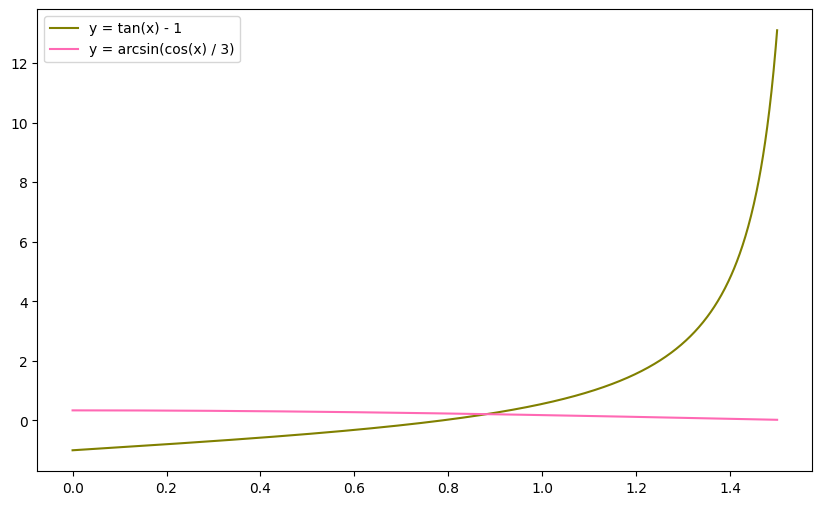

In [40]:
plt.figure(figsize=(10,6))
plt.plot(xs, y1(xs), label="y = tan(x) - 1", color="olive")
plt.plot(xs, y2(xs), label="y = arcsin(cos(x) / 3)", color="hotpink")
plt.legend(loc="best")
plt.show()

- Na wykresie rzeczywiście widać, że w podanym przedziale istnieje jedno rowiązanie naszego układu równań.

**Zadanie 6**

**Znajdowanie pierwiastków wielomianu**

Znajdź wszystkie pierwiastki wielomianu:

$$
w(x) = x^4 + (5 + i)x^3 - (8 - 5i)x^2 + (30 - 14i)x - 84,
$$

gdzie $ i $ oznacza jednostkę urojoną ($ i^2 = -1 $).


In [41]:
from random import random
import cmath

In [ ]:
def oblicz_wielomian(a,x):
    n = len(a) - 1
    p = a[n]
    dp = 0.0 + 0.0j
    ddp = 0.0 + 0.0j
    for i in range(1,n+1):
        ddp = ddp*x + 2.0*dp
        dp = dp*x + p
        p = p*x + a[n-i]
    return p,dp,ddp

def pierwiastki_wielomianu_znajdowanie(a,tol=1.0e-12):

    def metoda_laguerre(a,tol):
        x = random() 
        n = len(a) - 1
    
        for i in range(30):
            p,dp,ddp = oblicz_wielomian(a,x)
            if abs(p) < tol: 
                return x
            g = dp/p
            h = g*g - ddp/p
            f = cmath.sqrt((n - 1)*(n*h - g*g))
            if abs(g + f) > abs(g - f): 
                dx = n/(g + f)
            else: 
                dx = n/(g - f)
            x = x - dx
            if abs(dx) < tol: 
                return x
        print('zbyt duzo iteracji')
        
        
    def deflPoly(a,root):
        n = len(a)-1
        b = [(0.0 + 0.0j)]*n
        b[n-1] = a[n]
        for i in range(n-2,-1,-1):
            b[i] = a[i+1] + root*b[i+1]
        return b


    n = len(a) - 1
    roots = np.zeros((n),dtype=complex)
    for i in range(n):
        x = metoda_laguerre(a,tol)
        if abs(x.imag) < tol: x = x.real
        roots[i] = x
        a = deflPoly(a,x)
    return roots

In [ ]:
c = np.array([-84.0, (30.0-14.0j), (5.0j-8.0), (5.0+1.0j), 1.0])
pierwiastki = pierwiastki_wielomianu_znajdowanie(c)
print('Pierwiastki tego wielomianu to:\n',pierwiastki)

Pierwiastki tego wielomianu to:
 [ 2.00000000e+00+0.j  3.50929138e-16+2.j  4.44089210e-16-3.j
 -7.00000000e+00+0.j]


In [10]:
c = np.array([-84.0, (30.0-14.0j), (5.0j-8.0), (5.0+1.0j), 1.0])
f_wbudowana = np.roots(w)
print(f"Rozwiązanie za pomocą wbudowanej metody fsolve:\nx={f_wbudowana}")

Rozwiązanie za pomocą wbudowanej metody fsolve:
x=[-7.00000000e+00+0.00000000e+00j  5.85188382e-16-3.00000000e+00j
  2.00000000e+00+3.50386307e-16j  3.10321923e-16+2.00000000e+00j]
